In [75]:
import tweepy
from textblob import TextBlob
import pandas as pd
import numpy as np
import seaborn as svs
import matplotlib.pyplot as plt
import json
import vaderSentiment

# Twitter API Keys
consumer_key = "o3KOJTbjiCZT2AyO2CQDHWKi7"
consumer_secret = "LOH3HOcPec5mjCLRoIhNcDTN0uT1rZfcgNnHKTPC9RVGjTsWAt"
access_token = "979130648098213888-XtWXx5eJPDrVO035trVADGrsoWgIjc1"
access_token_secret = "jscAEJzN9YPB6HLDRVwLWWoDfb9U8RqbxZ1pBcl20jRt6"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())
#BBC, CBS, CNN, Fox, and New York times
cbs = "CBSNews"
fox = "FoxNews"
nyt = "nytimes"
cnn = "CNN"
bbc = "BBCBreaking"
BBC_tweets = api.user_timeline(screen_name = 'BBCBreaking', count = 100)
CBS_tweets = api.user_timeline(screen_name = 'CBSNews', count = 100)
nyt_tweets = api.user_timeline(screen_name = 'nytimes', count = 100)
Fox_tweets = api.user_timeline(screen_name = 'FoxNews', count = 100)
CNN_tweets = api.user_timeline(screen_name = 'CNN', count = 100)



In [74]:

CNN_response_df = pd.DataFrame(CNN_tweets)
CNN_df = pd.DataFrame()
CNN_df["Date"] = CNN_response_df["created_at"]
CNN_df["User_ID"] = 'CNN'
CNN_df["tweet_text"] = CNN_response_df["text"]


BBC_response_df = pd.DataFrame(BBC_tweets)
BBC_df = pd.DataFrame()
BBC_df["Date"] = BBC_response_df["created_at"]
BBC_df["User_ID"] = 'BBC'
BBC_df["tweet_text"] = BBC_response_df["text"]

Fox_response_df = pd.DataFrame(Fox_tweets)
Fox_df = pd.DataFrame()
Fox_df["Date"] = Fox_response_df["created_at"]
Fox_df["User_ID"] = 'Fox'
Fox_df["tweet_text"] = Fox_response_df["text"]


CBS_response_df = pd.DataFrame(CBS_tweets)
CBS_df = pd.DataFrame()
CBS_df["Date"] = CBS_response_df["created_at"]
CBS_df["User_ID"] = 'CBS'
CBS_df["tweet_text"] = CBS_response_df["text"]

nyt_response_df = pd.DataFrame(nyt_tweets)
nyt_df = pd.DataFrame()
nyt_df["Date"] =nyt_response_df["created_at"]
nyt_df["User_ID"] = 'nyt'
nyt_df["tweet_text"] = nyt_response_df["text"]
tweet_df = CNN_df.merge(BBC_df,how = "outer")
tweet_df = tweet_df.merge(Fox_df, how = "outer")
tweet_df = tweet_df.merge(CBS_df, how = "outer")
tweet_df = tweet_df.merge(nyt_df, how = "outer")
tweet_df.to_csv("tweets.csv")

,Date,User_ID,tweet_text
0,Sat Apr 14 13:15:59 +0000 2018,CNN,"Pentagon gives briefing on the Syria strike: ""..."
1,Sat Apr 14 13:10:06 +0000 2018,CNN,Officials at the Pentagon are giving updates o...
2,Sat Apr 14 13:01:00 +0000 2018,CNN,"24 pools. Tallest waterslide at sea. An ""Insta..."
3,Sat Apr 14 12:55:59 +0000 2018,CNN,"These are the weapons the US, UK and France us..."
4,Sat Apr 14 12:45:03 +0000 2018,CNN,Richard Wahl won the $533 million Mega Million...
5,Sat Apr 14 12:41:52 +0000 2018,CNN,There will be a United Nations Security Counci...
6,Sat Apr 14 12:38:15 +0000 2018,CNN,"Until the #SyriaStrikes were announced, Friday..."
7,Sat Apr 14 12:33:36 +0000 2018,CNN,JUST IN: President Trump tweets about the stri...
8,Sat Apr 14 12:31:59 +0000 2018,CNN,When a high school student with autism played ...
9,Sat Apr 14 12:31:00 +0000 2018,CNN,When a high school student with autism played ...


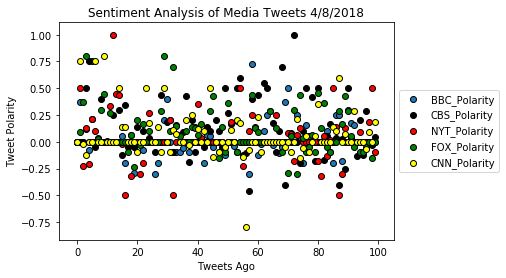

In [79]:


BBC_sentiments = []
CBS_sentiments = []
nyt_sentiments = []
Fox_sentiments = []
CNN_sentiments = []


for tweet in BBC_tweets:
    tweet_text = TextBlob(tweet['text'])
    BBC_sentiments.append(tweet_text.sentiment.polarity)
for tweet in CBS_tweets:
    tweet_text = TextBlob(tweet['text'])
    CBS_sentiments.append(tweet_text.sentiment.polarity)
for tweet in nyt_tweets:
    tweet_text = TextBlob(tweet['text'])
    nyt_sentiments.append(tweet_text.sentiment.polarity)
for tweet in CNN_tweets:
    tweet_text = TextBlob(tweet['text'])
    CNN_sentiments.append(tweet_text.sentiment.polarity)
for tweet in Fox_tweets:
    tweet_text = TextBlob(tweet['text'])
    Fox_sentiments.append(tweet_text.sentiment.polarity)
bbc_sentiments = np.array(BBC_sentiments)
cbs_sentiments = np.array(CBS_sentiments)
nyt_sentiments = np.array(nyt_sentiments)
fox_sentiments = np.array(Fox_sentiments)
cnn_sentiments = np.array(CNN_sentiments)

sentiment_df = pd.DataFrame()
sentiment_df['BBC_Polarity'] = bbc_sentiments
sentiment_df['CBS_Polarity'] = cbs_sentiments
sentiment_df['NYT_Polarity'] = nyt_sentiments
sentiment_df["FOX_Polarity"] = fox_sentiments
sentiment_df['CNN_Polarity'] = cnn_sentiments

plt.scatter(sentiment_df.index, sentiment_df["BBC_Polarity"], edgecolor = 'black')
plt.scatter(sentiment_df.index, sentiment_df["CBS_Polarity"], c = 'black', edgecolor = 'black')
plt.scatter(sentiment_df.index, sentiment_df["NYT_Polarity"], c = 'red', edgecolor = 'black')
plt.scatter(sentiment_df.index, sentiment_df["FOX_Polarity"], c = 'green', edgecolor = 'black')
plt.scatter(sentiment_df.index, sentiment_df["CNN_Polarity"], c = 'yellow', edgecolor = 'black')
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.title("Sentiment Analysis of Media Tweets 4/8/2018")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("Polarity_Scatter.png")



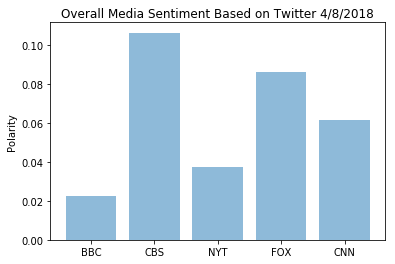

In [78]:
bbc_average_pol = sentiment_df['BBC_Polarity'].mean()
cbs_average_pol = sentiment_df['CBS_Polarity'].mean()
nyt_average_pol = sentiment_df['NYT_Polarity'].mean()
fox_average_pol = sentiment_df["FOX_Polarity"].mean()
cnn_average_pol = sentiment_df['CNN_Polarity'].mean()
labels = ("BBC", 'CBS', 'NYT', 'FOX', 'CNN')
y_pos = np.arange(len(labels))
polarities = [bbc_average_pol, cbs_average_pol, nyt_average_pol, fox_average_pol, cnn_average_pol]
 
plt.bar(y_pos, polarities, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.ylabel('Polarity')
plt.title('Overall Media Sentiment Based on Twitter 4/8/2018')
plt.savefig("Polarity_Bar_Chart.png")
plt.show()

[{'contributors': None,
  'coordinates': None,
  'created_at': 'Sat Apr 14 12:29:36 +0000 2018',
  'entities': {'hashtags': [],
   'symbols': [],
   'urls': [{'display_url': 'bbc.in/2JGOvcN',
     'expanded_url': 'https://bbc.in/2JGOvcN',
     'indices': [115, 138],
     'url': 'https://t.co/FWlRMuKLXv'}],
   'user_mentions': []},
  'favorite_count': 358,
  'favorited': False,
  'geo': None,
  'id': 985132963372457984,
  'id_str': '985132963372457984',
  'in_reply_to_screen_name': None,
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_id_str': None,
  'is_quote_status': False,
  'lang': 'en',
  'place': None,
  'possibly_sensitive': False,
  'retweet_count': 179,
  'retweeted': False,
  'source': '<a href="http://www.socialflow.com" rel="nofollow">SocialFlow</a>',
  'text': 'Trump hails "perfectly executed" strikes on Syria after alleged chemical attack, concluding "Mission Accomplished" https://t.co/FWlRMuKLXv',
 